# Biomedical Data Bases 2022-23   --   Module I
## Introduction to pandas  --  The Python Data Analysis Library
### Data Analysis, Data Manipulation, Data Visualization

<br>
<br>
Documentation:   https://pandas.pydata.org/docs/index.html

Some useful sites:    
https://jakevdp.github.io/PythonDataScienceHandbook/   
https://medium.com/@harrypotter0/an-introduction-to-data-analysis-with-pandas-27ecbce2853



### &emsp; &emsp; 1. Pandas objects: Series and DataFrame
### &emsp; &emsp; 2. Accessing elements (by index or conditions)
### &emsp; &emsp; 3. Data Manipulation
### &emsp; &emsp; 4. Reading and Writing
### &emsp; &emsp; 5. Plot data
### &emsp; &emsp; 6. Grouping
<br>

In [1]:
import numpy as np
import pandas as pd

### 1. Pandas objects:  Series and DataFrame

#### 1.1 Pandas Series

In [2]:
mySeries = pd.Series([0.25, 0.5, 0.75, 1.0, 1.25, 1.5])
mySeries

0    0.25
1    0.50
2    0.75
3    1.00
4    1.25
5    1.50
dtype: float64

##### Series is an object which is similar to the Python list but differs from it because it has associated label with each element or so-called index.

##### Series has attributes to extract its values and index:

In [3]:
mySeries.values

#print (mySeries.values)

#type (mySeries.values)

array([0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 ])

##### The "values" are a numpy array

In [4]:
print (mySeries.index)

type (mySeries.index)

RangeIndex(start=0, stop=6, step=1)


pandas.core.indexes.range.RangeIndex

In [5]:
for i in mySeries.index:
    print (i)

0
1
2
3
4
5


##### The index is an array-like object of type pd.Index, or more precisely in this case, of type pd.RangeIndex

##### Like with a python list or with a NumPy array, data can be accessed by the associated index via the python square-bracket notation:

In [6]:
mySeries[2]

0.75

In [7]:
mySeries[1:4]


1    0.50
2    0.75
3    1.00
dtype: float64

##### While a list has no index, and a one-dimensional NumPy array has an implicitly defined integer index, the Pandas Series has an explicitly defined index -- which, in addition, need not be an integer:


In [8]:
#mySeries2 = pd.Series([0.25, 0.5, 0.75, 1.0, 1.25, 1.5], index=['a', 'b', 'c', 'd', 'e', 'f'])
#mySeries2 

mySeries2 = pd.Series([0.25, 0.5, 0.75, 1.0, 1.25, 1.5], index= list('abcdef'))
mySeries2 



a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
f    1.50
dtype: float64

In [9]:
mySeries2.index

Index(['a', 'b', 'c', 'd', 'e', 'f'], dtype='object')

##### Notice that with a not integer index, slicing has different rules 

In [10]:
mySeries2['a':'c']     

a    0.25
b    0.50
c    0.75
dtype: float64

##### One can retrieve 1, or more than 1, elements by their indexes:

In [11]:
print (mySeries2[['a']], '\n')

print (mySeries2[['a','c','e']])

a    0.25
dtype: float64 

a    0.25
c    0.75
e    1.25
dtype: float64


##### ...or make group assignment:

In [12]:
mySeries2[['a','c','e']]=0
mySeries2

a    0.0
b    0.5
c    0.0
d    1.0
e    0.0
f    1.5
dtype: float64

##### Filtering and math operations can be done as well:

In [13]:
mySeries2[mySeries2 > 0.7]

d    1.0
f    1.5
dtype: float64

In [14]:
mySeries2[mySeries2 > 0.7] + 4


d    5.0
f    5.5
dtype: float64

#####  Notice that the assignment has changed the Series, while the math operation not:

In [15]:
mySeries2

a    0.0
b    0.5
c    0.0
d    1.0
e    0.0
f    1.5
dtype: float64

##### You can also build pandas Series out of Python dictionaries:

In [16]:
myDict = {'a': 5, 'b': 6, 'c': 7, 'd': 8}

mySeries3 = pd.Series(myDict)
mySeries3

a    5
b    6
c    7
d    8
dtype: int64

##### Series object and its index have name attributes, so you can label them:

In [17]:
mySeries2.name = 'numbers'
mySeries2.index.name = 'letters'

print (mySeries2)

print ("Name = ", mySeries2.name)
print ("Index name =", mySeries2.index.name)

letters
a    0.0
b    0.5
c    0.0
d    1.0
e    0.0
f    1.5
Name: numbers, dtype: float64
Name =  numbers
Index name = letters


##### ...or unlabel them:

In [18]:
mySeries2.name = None
mySeries2.index.name = None

print (mySeries2)

print (mySeries2.name)
print (mySeries2.index.name)

a    0.0
b    0.5
c    0.0
d    1.0
e    0.0
f    1.5
dtype: float64
None
None


##### One can also apply python string methods to modify Series elements:

In [19]:
mySeries2.index = mySeries2.index.str.upper()
print (mySeries2)

A    0.0
B    0.5
C    0.0
D    1.0
E    0.0
F    1.5
dtype: float64


In [20]:
mySeries2.index = mySeries2.index.str.lower()
print (mySeries2)

a    0.0
b    0.5
c    0.0
d    1.0
e    0.0
f    1.5
dtype: float64


#### 1.2 Pandas DataFrame

##### A DataFrame is in essence a table. It has rows and columns. 

##### Each column in a DataFrame is a Series object, rows consist of elements inside Series.

##### A DataFrame can be built using e.g. a Python dictionary

In [21]:
# brief recall of python dictionaries

# create a dictionary:  d = {key1:value1, key2:value2, etc}
dict_test = dict({'Spanish':'Buenos días', 'German': 'Guten Morgen', 'Swedish':'God Morgon'})

# print the items of dictionary
print ('Dictionary items =', dict_test.items(), '\n')

# get a value by its key
print ('Value of the Swedish key =', dict_test['Swedish'], '\n' ) 

# get all keys
print ('All keys =', dict_test.keys(), '\n')


Dictionary items = dict_items([('Spanish', 'Buenos días'), ('German', 'Guten Morgen'), ('Swedish', 'God Morgon')]) 

Value of the Swedish key = God Morgon 

All keys = dict_keys(['Spanish', 'German', 'Swedish']) 



##### A DataFrame can be built using e.g. a Python dictionary:

In [22]:
my_dict = {
...     'country': ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain'],
...     'population': [83.78, 67.89, 65.27, 60.46, 46.75],
...     'square_km': [348560, 241930, 547557, 294140, 498800]
... }

df = pd.DataFrame(my_dict)
df

,country,population,square_km
0,Germany,83.78,348560
1,United Kingdom,67.89,241930
2,France,65.27,547557
3,Italy,60.46,294140
4,Spain,46.75,498800


##### Notice that the 'values' of 'my_dict' are lists. The number of rows of the resulting Dataframe will be the same as the number of elements in each list.
##### The 'keys' of the dictionary become the names of the columns.

##### Or, more direcly, you can obtain the same by inserting the dictionary in the Dataframe function explicity:

In [23]:
df = pd.DataFrame({
...     'country': ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain'],
...     'population': [83.78, 67.89, 65.27, 60.46, 46.75],
...     'square_km': [348560, 241930, 547557, 294140, 498800]
... })
df

,country,population,square_km
0,Germany,83.78,348560
1,United Kingdom,67.89,241930
2,France,65.27,547557
3,Italy,60.46,294140
4,Spain,46.75,498800


##### You can also do the same, by starting from 3 Series (you insert as 'values' of the dictionary Series in place of lists:

In [24]:
myseries_country = pd.Series(['Germany', 'United Kingdom', 'France', 'Italy', 'Spain'])
myseries_pop = pd.Series([83.78, 67.89, 65.27, 60.46, 46.75])
myseries_area = pd.Series([348560, 241930, 547557, 294140, 498800])


df2  = pd.DataFrame({'country': myseries_country, 'population': myseries_pop, 'square_km': myseries_area })
df2

,country,population,square_km
0,Germany,83.78,348560
1,United Kingdom,67.89,241930
2,France,65.27,547557
3,Italy,60.46,294140
4,Spain,46.75,498800


##### ...or, e.g., using the function 'concat': 

In [25]:
df3 = pd.concat([myseries_country, myseries_pop, myseries_area], axis=1)
df3

,0,1,2
0,Germany,83.78,348560
1,United Kingdom,67.89,241930
2,France,65.27,547557
3,Italy,60.46,294140
4,Spain,46.75,498800


##### while creating the Series, you can assign names to them, they will become column names:

In [26]:
myseries_country = pd.Series(['Germany', 'United Kingdom', 'France', 'Italy', 'Spain'], name = 'country')
myseries_pop = pd.Series([83.78, 67.89, 65.27, 60.46, 46.75],                           name = 'population')
myseries_area = pd.Series([348560, 241930, 547557, 294140, 498800],                     name = 'square_km')


df3 = pd.concat([myseries_country, myseries_pop, myseries_area], axis =1)
df3

,country,population,square_km
0,Germany,83.78,348560
1,United Kingdom,67.89,241930
2,France,65.27,547557
3,Italy,60.46,294140
4,Spain,46.75,498800


##### Alternatively, assign keys while concatenating:

In [27]:
myseries_country = pd.Series(['Germany', 'United Kingdom', 'France', 'Italy', 'Spain'])
myseries_pop = pd.Series([83.78, 67.89, 65.27, 60.46, 46.75])
myseries_area = pd.Series([348560, 241930, 547557, 294140, 498800])

df4 = pd.concat([myseries_country, myseries_pop, myseries_area], axis=1, keys=['Country', 'Population', 'Square_km'])
df4


,Country,Population,Square_km
0,Germany,83.78,348560
1,United Kingdom,67.89,241930
2,France,65.27,547557
3,Italy,60.46,294140
4,Spain,46.75,498800


##### You can think of a DataFrame which 'degenerates' to a single column:

In [28]:
myseries_country = pd.Series(['Germany', 'United Kingdom', 'France', 'Italy', 'Spain'])

df_deg = pd.DataFrame({'country':myseries_country})
df_deg

,country
0,Germany
1,United Kingdom
2,France
3,Italy
4,Spain


##### ... and convert it back to a Series:

In [29]:
series_from_df_deg = df_deg['country']
print (series_from_df_deg)
type (series_from_df_deg)

0           Germany
1    United Kingdom
2            France
3             Italy
4             Spain
Name: country, dtype: object


pandas.core.series.Series

##### By the way, a Series can be converted to a python list:

In [30]:
list_from_Series = df_deg['country'].to_list()
print (list_from_Series)
type (list_from_Series)

['Germany', 'United Kingdom', 'France', 'Italy', 'Spain']


list

##### ... and a Dataframe can be converted to a python dictionary

In [31]:
df

,country,population,square_km
0,Germany,83.78,348560
1,United Kingdom,67.89,241930
2,France,65.27,547557
3,Italy,60.46,294140
4,Spain,46.75,498800


In [32]:
dict_from_dataframe = df.to_dict()
print (dict_from_dataframe)
type (dict_from_dataframe)


{'country': {0: 'Germany', 1: 'United Kingdom', 2: 'France', 3: 'Italy', 4: 'Spain'}, 'population': {0: 83.78, 1: 67.89, 2: 65.27, 3: 60.46, 4: 46.75}, 'square_km': {0: 348560, 1: 241930, 2: 547557, 3: 294140, 4: 498800}}


dict

##### You can output each column separately:

In [33]:
print (df['country'])   # Python dictionary notation

print (df.country)      # attribute notation

0           Germany
1    United Kingdom
2            France
3             Italy
4             Spain
Name: country, dtype: object
0           Germany
1    United Kingdom
2            France
3             Italy
4             Spain
Name: country, dtype: object


##### The two synthaxes are almost always equivalent (unless the name of a column happens to coincide with the name of a Dataframe method, or, also, if the name of the column contains spaces):

In [34]:
df['country'] == df.country

0    True
1    True
2    True
3    True
4    True
Name: country, dtype: bool

##### Notice that the use of double square bracket generate a Dataframe, while single square bracket generate a Series:

In [35]:
print ("type(df[['country']]) =  ", type(df[['country']]))
print ("type(df['country']) =  ",  type(df['country']))
print ("type(df.country) =  ",  type(df.country))

type(df[['country']]) =   <class 'pandas.core.frame.DataFrame'>
type(df['country']) =   <class 'pandas.core.series.Series'>
type(df.country) =   <class 'pandas.core.series.Series'>


 #####
 ### 2. Accessing elements (by index or conditions)

##### The DataFrame object has 2 indexes: column index and row index:

In [36]:
print (df.index)

RangeIndex(start=0, stop=5, step=1)


In [37]:
print (df.columns)

Index(['country', 'population', 'square_km'], dtype='object')


##### You can provide row index explicitly:

In [38]:
df.index = ['DE', 'UK', 'FR', 'IT', 'SP']
df

,country,population,square_km
DE,Germany,83.78,348560
UK,United Kingdom,67.89,241930
FR,France,65.27,547557
IT,Italy,60.46,294140
SP,Spain,46.75,498800


##### ... and an index name:

In [39]:
print (df.index.name)

None


In [40]:
df.index.name = 'country_code'
df

,country,population,square_km
country_code,,,
DE,Germany,83.78,348560
UK,United Kingdom,67.89,241930
FR,France,65.27,547557
IT,Italy,60.46,294140
SP,Spain,46.75,498800


In [41]:
df[['country']]

,country
country_code,
DE,Germany
UK,United Kingdom
FR,France
IT,Italy
SP,Spain


##### Row access using index can be performed:
#####  &emsp; &emsp; * using .loc and providing index label
##### &emsp; &emsp;  * using .iloc and providing index number



In [42]:
print (df.loc['FR'])     # output a Series
df.loc[['FR']]           # output a Dataframe


country       France
population     65.27
square_km     547557
Name: FR, dtype: object


,country,population,square_km
country_code,,,
FR,France,65.27,547557


In [43]:
print (df.iloc[2])       # output a Series
df.iloc[[2]]             # output a Dataframe


country       France
population     65.27
square_km     547557
Name: FR, dtype: object


,country,population,square_km
country_code,,,
FR,France,65.27,547557


##### .iloc and .loc take actually 2 arguments: index list and column list:

In [44]:
df.iloc[[0,2,4], [0,2] ]

,country,square_km
country_code,,
DE,Germany,348560
FR,France,547557
SP,Spain,498800


In [45]:
df.loc[['DE','FR','SP'], ['country', 'square_km']]

,country,square_km
country_code,,
DE,Germany,348560
FR,France,547557
SP,Spain,498800


##### Notice the different behavior of slicing in .loc (strings) and in .iloc (integers):

In [46]:
print(df.loc['FR':'IT',:])
print (df.iloc[2:4,:])

             country  population  square_km
country_code                               
FR            France       65.27     547557
IT             Italy       60.46     294140
             country  population  square_km
country_code                               
FR            France       65.27     547557
IT             Italy       60.46     294140


#####
##### Filtering by condition is performed using so-called Boolean arrays:

In [47]:
df.population > 60           # output a Series (with Boolean values)

# df['population'] > 60      # same as above

# df[['population']] > 60    # output a Dataframe (with Boolean values)


country_code
DE     True
UK     True
FR     True
IT     True
SP    False
Name: population, dtype: bool

#####  To obtain a filtered Dataframe, you give in input the boolean array to the dataframe:

In [48]:
df[(df.population > 60)] 

,country,population,square_km
country_code,,,
DE,Germany,83.78,348560
UK,United Kingdom,67.89,241930
FR,France,65.27,547557
IT,Italy,60.46,294140


##### A slightly more complex condition:

In [49]:
df[(df.population > 60) & (df.square_km < 300000)]

,country,population,square_km
country_code,,,
UK,United Kingdom,67.89,241930
IT,Italy,60.46,294140


##### The _query_ function allows for applying filtering conditions as strings:

In [50]:
df.query("population > 60")

,country,population,square_km
country_code,,,
DE,Germany,83.78,348560
UK,United Kingdom,67.89,241930
FR,France,65.27,547557
IT,Italy,60.46,294140


##### With the 'query' method, the boolean operators are also inserted as strings:

In [53]:
df.query("population > 60 and square_km < 300000")

,country,population,square_km
country_code,,,
UK,United Kingdom,67.89,241930
IT,Italy,60.46,294140


#####
### 3. Data Manipulation

In [59]:
# this command re-create the Dataframe named 'df'

df = pd.DataFrame({'country': ['Germany', 'United Kingdom', 'France', 'Italy', 'Spain'],\
                   'population': [83.78, 67.89, 65.27, 60.46, 46.75],\
                   'square_km': [348560, 241930, 547557, 294140, 498800]}, \
                  index=['DE','UK','FR','IT','SP']) 
df

,country,population,square_km
DE,Germany,83.78,348560
UK,United Kingdom,67.89,241930
FR,France,65.27,547557
IT,Italy,60.46,294140
SP,Spain,46.75,498800


##### One can add a new column (with population density):

In [61]:
df['density'] = df['population'] / df['square_km'] * 1000000
df

,country,population,square_km,density
DE,Germany,83.78,348560,240.360340
UK,United Kingdom,67.89,241930,280.618361
FR,France,65.27,547557,119.202202
IT,Italy,60.46,294140,205.548378
SP,Spain,46.75,498800,93.724940


In [62]:
df.density.dtypes

dtype('float64')

##### Let's change to integer type:

In [63]:
df.density = df.density.astype('int64')
print (df.dtypes)
df


country        object
population    float64
square_km       int64
density         int64
dtype: object


,country,population,square_km,density
DE,Germany,83.78,348560,240
UK,United Kingdom,67.89,241930,280
FR,France,65.27,547557,119
IT,Italy,60.46,294140,205
SP,Spain,46.75,498800,93


##### Or we could have also added the column directly:

In [64]:
df['density_by_hand'] = pd.Series([240,280,119,205,93]).values
df

#pd.Series([240,280,119,205,93]).values

,country,population,square_km,density,density_by_hand
DE,Germany,83.78,348560,240,240
UK,United Kingdom,67.89,241930,280,280
FR,France,65.27,547557,119,119
IT,Italy,60.46,294140,205,205
SP,Spain,46.75,498800,93,93


##### ...or we can delete it:

In [65]:
df_5 = df.drop(['density_by_hand'], axis=1)
df_5

        #or equivalently

#df_5 = df.drop(columns=['density_by_hand'])
#df_5

,country,population,square_km,density
DE,Germany,83.78,348560,240
UK,United Kingdom,67.89,241930,280
FR,France,65.27,547557,119
IT,Italy,60.46,294140,205
SP,Spain,46.75,498800,93


##### Use of "inplace=True":

In [66]:
df.drop(['density_by_hand'], axis = 1)
df

,country,population,square_km,density,density_by_hand
DE,Germany,83.78,348560,240,240
UK,United Kingdom,67.89,241930,280,280
FR,France,65.27,547557,119,119
IT,Italy,60.46,294140,205,205
SP,Spain,46.75,498800,93,93


##### It seems not to work. In reality, the .drop() method has a default value 'False' for the parameter "inplace"  (check e.g. the pandas documentation).
##### By switching to 'inplace= True', the changes are effectively made to the Dataframe in a permanent way:

In [67]:
df.drop(['density_by_hand'], axis = 1, inplace=True)
df

,country,population,square_km,density
DE,Germany,83.78,348560,240
UK,United Kingdom,67.89,241930,280
FR,France,65.27,547557,119
IT,Italy,60.46,294140,205
SP,Spain,46.75,498800,93


##### Of course one can also drop e.g. rows:

In [ ]:
df6 = df.drop('UK')    # axis=0 is the default
df6


##### Columns can be renamed
##### (1) by the 'rename' function

In [68]:
df7 = df.rename(columns={'density': 'density_per_square_km'})
df7


,country,population,square_km,density_per_square_km
DE,Germany,83.78,348560,240
UK,United Kingdom,67.89,241930,280
FR,France,65.27,547557,119
IT,Italy,60.46,294140,205
SP,Spain,46.75,498800,93


##### ... or (2) by assigning a list of new column names:

In [69]:
df7.columns = ['Country', 'Population' ,'Square_km', 'Density_per_square_km']
df7


,Country,Population,Square_km,Density_per_square_km
DE,Germany,83.78,348560,240
UK,United Kingdom,67.89,241930,280
FR,France,65.27,547557,119
IT,Italy,60.46,294140,205
SP,Spain,46.75,498800,93


##### Here is a bit more complex way to bringing back the uppercase to lowercase:

In [70]:
df7.columns=pd.Series(df7.columns).str.lower().to_list()
df7

,country,population,square_km,density_per_square_km
DE,Germany,83.78,348560,240
UK,United Kingdom,67.89,241930,280
FR,France,65.27,547557,119
IT,Italy,60.46,294140,205
SP,Spain,46.75,498800,93


### 4. Reading and Writing

##### Pandas supports many popular file formats including CSV, XML, HTML, Excel, SQL, JSON and many more.

##### Probably one of the most used format is CSV. &emsp;To save your DataFrame to a csv file: 


In [71]:
df

,country,population,square_km,density
DE,Germany,83.78,348560,240
UK,United Kingdom,67.89,241930,280
FR,France,65.27,547557,119
IT,Italy,60.46,294140,205
SP,Spain,46.75,498800,93


In [72]:
df.to_csv('df_table.csv')

In [73]:
! ls *.csv

covid19-sample.csv  df_table.csv


In [ ]:
! cat df_table.csv

##### The 'to_csv' method takes many arguments (for example, the type of separator character).

##### What about *reading* data ?

In [74]:
df_uploaded = pd.read_csv('df_table.csv')
df_uploaded

,Unnamed: 0,country,population,square_km,density
0,DE,Germany,83.78,348560,240
1,UK,United Kingdom,67.89,241930,280
2,FR,France,65.27,547557,119
3,IT,Italy,60.46,294140,205
4,SP,Spain,46.75,498800,93


##### To recompose the original dataframe: 

In [75]:
df_uploaded = pd.read_csv('df_table.csv', index_col=[0])
df_uploaded

,country,population,square_km,density
DE,Germany,83.78,348560,240
UK,United Kingdom,67.89,241930,280
FR,France,65.27,547557,119
IT,Italy,60.46,294140,205
SP,Spain,46.75,498800,93


##### ooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo
#####    

##### Write and read Excel files:

In [76]:
df.to_excel('df_table.xlsx')
!ls *.xlsx

covid19-sample.xlsx  df_table.xlsx


##### The above command should issue an error, if you have not installed the 'openpyxl' package.  So please do it:

In [77]:
! pip install openpyxl

In [79]:
df.to_excel('df_table.xlsx')
!ls *.xlsx

covid19-sample.xlsx  df_table.xlsx


In [80]:
df_from_excel = pd.read_excel('df_table.xlsx', index_col=[0])
df_from_excel 

,country,population,square_km,density
DE,Germany,83.78,348560,240
UK,United Kingdom,67.89,241930,280
FR,France,65.27,547557,119
IT,Italy,60.46,294140,205
SP,Spain,46.75,498800,93


##### Create a dataframe from a URL:

In [81]:
! wget http://bit.ly/movieusers

--2022-11-25 20:35:53--  http://bit.ly/movieusers
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/u.user [following]
--2022-11-25 20:35:54--  https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/u.user
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22628 (22K) [text/plain]
Saving to: ‘movieusers.1’

movieusers.1        100%[===================>]  22.10K  --.-KB/s    in 0.04s   

2022-11-25 20:35:54 (614 KB/s) - ‘movieusers.1’ saved [22628/22628]



In [82]:
! cat movieusers

1|24|M|technician|85711
2|53|F|other|94043
3|23|M|writer|32067
4|24|M|technician|43537
5|33|F|other|15213
6|42|M|executive|98101
7|57|M|administrator|91344
8|36|M|administrator|05201
9|29|M|student|01002
10|53|M|lawyer|90703
11|39|F|other|30329
12|28|F|other|06405
13|47|M|educator|29206
14|45|M|scientist|55106
15|49|F|educator|97301
16|21|M|entertainment|10309
17|30|M|programmer|06355
18|35|F|other|37212
19|40|M|librarian|02138
20|42|F|homemaker|95660
21|26|M|writer|30068
22|25|M|writer|40206
23|30|F|artist|48197
24|21|F|artist|94533
25|39|M|engineer|55107
26|49|M|engineer|21044
27|40|F|librarian|30030
28|32|M|writer|55369
29|41|M|programmer|94043
30|7|M|student|55436
31|24|M|artist|10003
32|28|F|student|78741
33|23|M|student|27510
34|38|F|administrator|42141
35|20|F|homemaker|42459
36|19|F|student|93117
37|23|M|student|55105
38|28|F|other|54467
39|41|M|entertainment|01040
40|38|M|scientist|27514
41|33|M|engineer|80525
42|30|M|administrator|17870
43|29|F|librarian|20854
44|26|M|technic

##### Read the file using the '|' separator:

In [83]:
df_movieusers = pd.read_csv('http://bit.ly/movieusers', sep='|')
df_movieusers

,1,24,M,technician,85711
0,2,53,F,other,94043
1,3,23,M,writer,32067
2,4,24,M,technician,43537
3,5,33,F,other,15213
4,6,42,M,executive,98101
...,...,...,...,...,...
937,939,26,F,student,33319
938,940,32,M,administrator,02215
939,941,20,M,student,97229
940,942,48,F,librarian,78209


##### Remove the firt-row-header default:

In [84]:
df_movieusers = pd.read_csv('http://bit.ly/movieusers', sep='|', header=None)
df_movieusers.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


##### Rename the columns:

In [85]:
df_movieusers.columns = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
df_movieusers

        # Or give names to columns while reading the file

# user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
# df_movieusers = pd.read_csv('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)
# df_movieusers.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


##### Get general info about the new dataframe:

In [ ]:
df_movieusers.shape

In [ ]:
df_movieusers.size

In [ ]:
df_movieusers.info(memory_usage='deep')

In [ ]:
# df_movieusers.describe()

df_movieusers.describe(include = 'all')  # include also non numerical values

##### Find out how many different occupations are there:

In [ ]:
df_movieusers.occupation.unique()


##### Other ways of getting the number of unique occupations:

In [ ]:
#df_movieusers.occupation.unique().size

df_movieusers.occupation.unique().shape

In [ ]:
len(df_movieusers.occupation.unique())

In [ ]:
pd.Series(df_movieusers.occupation.unique()).count()

##### Find out how many persons per occupation type:

In [86]:
df_movieusers.occupation.value_counts()


student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

##### Yet a different way of counting:

In [87]:
df_movieusers.occupation.value_counts().count()

21

##### Convert the Series into a Dataframe:

In [88]:
df_occ = pd.DataFrame({'occupation #': df_movieusers.occupation.value_counts()})
df_occ
# df_occ.count() 

,occupation #
student,196
other,105
educator,95
administrator,79
engineer,67
programmer,66
librarian,51
writer,45
executive,32
scientist,31


### 5. Plot data 

##### Plot data with matplotlib:

In [89]:
# Notice: this line might be redundant

%matplotlib inline

##### Create a simple dataframe:

In [90]:
df_parabola = pd.DataFrame({'x': range(2,15,2), 'y':list(i*i for i in range(2,15,2)) })
df_parabola

,x,y
0,2,4
1,4,16
2,6,36
3,8,64
4,10,100
5,12,144
6,14,196


<AxesSubplot:>

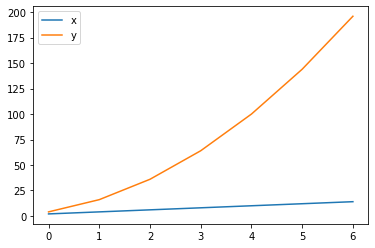

In [91]:
df_parabola.plot()

##### We do need to specify which column is ascissa and which one is ordinate:

<AxesSubplot:xlabel='x'>

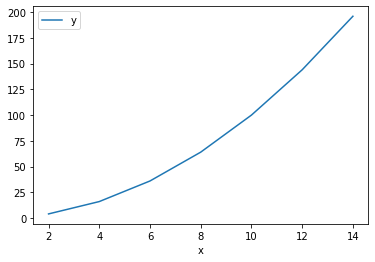

In [92]:
df_parabola.plot(x='x', y='y')

<AxesSubplot:xlabel='x'>

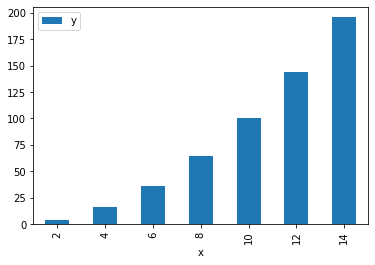

In [93]:
#df_parabola.plot(x='x', y='y', kind ='bar')

df_parabola.plot.bar(x='x', y='y')

In [94]:
df_cubic = pd.DataFrame({'x':list(range(2,15,2)), 'y':list(i*i for i in range(2,15,2)), 'z':list(i**3 for i in range(2,15,2)) })
df_cubic

,x,y,z
0,2,4,8
1,4,16,64
2,6,36,216
3,8,64,512
4,10,100,1000
5,12,144,1728
6,14,196,2744


<AxesSubplot:xlabel='x'>

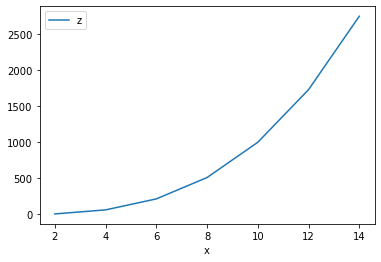

In [95]:
df_cubic.plot(x='x', y='z')

#####  The pyplot library allows for different formattings:

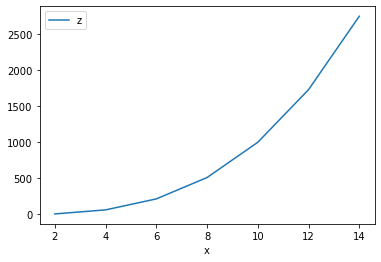

In [96]:
import matplotlib.pyplot as plt
df_cubic.plot(x='x', y='z')
plt.show()

<AxesSubplot:xlabel='x'>

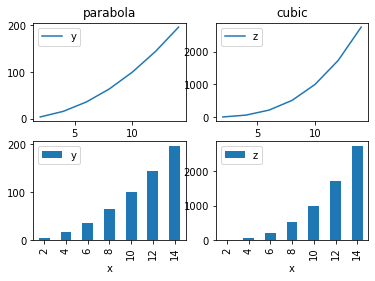

In [97]:
fig, axes = plt.subplots(nrows=2,ncols=2)
df_parabola.plot(x='x', y='y',ax=axes[0,0]); axes[0,0].set_title('parabola')
df_parabola.plot(x='x', y='y',ax=axes[1,0], kind='bar')
df_cubic.plot(x='x', y='z',ax=axes[0,1]); axes[0,1].set_title('cubic')
df_cubic.plot(x='x', y='z',ax=axes[1,1], kind='bar') 
 


##### Plot data with seaborn:

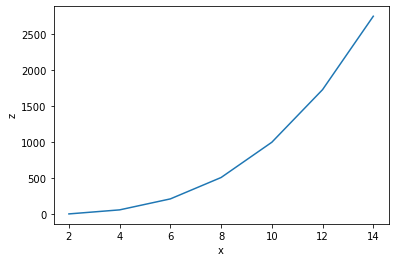

In [98]:
import seaborn as sns

sns.lineplot(x=df_cubic.x, y=df_cubic.z)

plt.show()

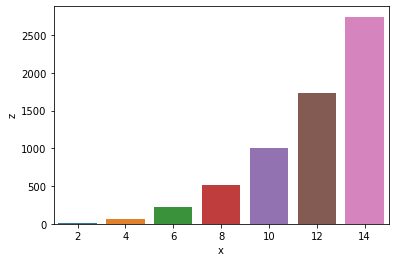

In [99]:
sns.barplot(x=df_cubic.x, y=df_cubic.z)

plt.show()

### 6. Grouping 

##### Grouping is probably one of the most popular methods in data analysis. In pandas you can use the .groupby method.
##### For demonstration we use the movieusers database:

In [ ]:
# user_cols = ['user_id', 'age', 'gender', 'occupation', 'zip_code']
# df_movieusers = pd.read_csv('http://bit.ly/movieusers', sep='|', header=None, names=user_cols)
df_movieusers.head()

In [ ]:
df_movieusers.describe(include='all')


In [ ]:
df_movieusers.groupby(['gender']).count()

            # show only the column 'user_id':

# df_movieusers.groupby(['gender'])[['user_id']].count() # Dataframe
# df_movieusers.groupby(['gender'])['user_id'].count()   # Series

##### To analyze the same data by occupation, let's combine the twos:

In [ ]:
df_grouped_1 = df_movieusers.groupby(['gender','occupation'])[['user_id']].count()
df_grouped_1

In [ ]:
df_grouped_1.unstack()

In [ ]:
type(df_movieusers.groupby(['gender','occupation'])[['user_id']].count())

##### Invert the order:

In [ ]:
df_grouped_2 = df_movieusers.groupby(['occupation', 'gender'])[['user_id']].count()
df_grouped_2

In [ ]:
df_grouped_2.unstack()

# my_df.unstack().fillna(0).astype('int32')


##### Before unstacking, the index of the grouped df_movieusers dataframe is of the type 'multiIndex':

In [ ]:
print (type(df_grouped_1.index))
print (df_grouped_1.index)


##### After unstacking:

In [ ]:
print (type(df_grouped_1.unstack().index))
print (df_grouped_1.unstack().index)

##### Pivot table:

In [ ]:
pvt = df_movieusers.pivot_table(index=['gender'], columns=['occupation'],  values='user_id', aggfunc='count')
pvt

In [ ]:
pvt = df_movieusers.pivot_table(index=['occupation'], columns=['gender'],  values='user_id', aggfunc='count')
pvt

##### Pivot tables -- Data analysis often implies a process of grouping, summarising, 
##### aggregating and calculating statistics about this data. Pandas pivot tables 
##### provide a tool to perform these analysis.  In the figure below an additional example:


In [100]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="pvt.jpg", width=400, height=400)